In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


bs013 = pd.merge(pd.read_csv('data/BS013_trans.csv', sep=';', decimal=',', ), pd.read_csv('data/BS013_refl.csv', sep=';', decimal=',', ), how='outer', on='Wavelength (nm)', suffixes=('trans', 'refl')).dropna(how='all', axis=1)
bs025 = pd.merge(pd.read_csv('data/BS025_trans.csv', sep=';', decimal=',', ), pd.read_csv('data/BS025_refl.csv', sep=';', decimal=',', ), how='outer', on='Wavelength (nm)', suffixes=('trans', 'refl')).dropna(how='all', axis=1)
dmlp463 = pd.read_csv('data/DMLP463.csv', sep=';', decimal='.')
dmlp550 = pd.read_csv('data/DMLP550.csv', sep=';', decimal='.')
dmlp605 = pd.read_csv('data/DMLP605.csv', sep=';', decimal='.')
fbh450 = pd.read_csv('data/FBH450-10.csv', sep=';', decimal=',')
fbh480 = pd.read_csv('data/FBH480-10.csv', sep=';', decimal=',')
fbh515 = pd.read_csv('data/FBH515_trans.csv', sep=';', decimal=',')
fbh570 = pd.read_csv('data/FBH570-10.csv', sep=';', decimal=',')
fbh590 = pd.read_csv('data/FBH590-10.csv', sep=';', decimal=',')
eo436 = pd.read_csv('data/EO436-10.csv', sep=';', decimal='.')
eo486 = pd.read_csv('data/EO486-10.csv', sep=';', decimal='.')
eo656 = pd.read_csv('data/EO656-10.csv', sep=';', decimal='.')
fbh780 = pd.read_csv('data/FBH780-10.csv', sep=';', decimal=',')

In [3]:
tables = {
  # "bs013": bs013,
  "bs025": bs025,
  "dmlp463": dmlp463,
  "dmlp550": dmlp550,
  "dmlp605": dmlp605,
  "fbh450": fbh450,
  "fbh480": fbh480,
  "fbh515": fbh515,
  "fbh570": fbh570,
  "fbh590": fbh590,
  "eo436": eo436,
  "eo486": eo486,
  "eo656": eo656,
  "fbh780": fbh780,
}

# Convert bs013 columns to numeric and normalize
spec = bs013.add_prefix('bs013_')
spec.rename(columns={'bs013_Wavelength (nm)': 'Wavelength (nm)'}, inplace=True)
spec.loc[:, spec.columns != "Wavelength (nm)"] = spec.loc[:, spec.columns != "Wavelength (nm)"]/100

# Process each table
for name, table in tables.items():
  # Rename columns that start with '%'
  for col in table.columns:
    if col.startswith('%'):
      table.rename(columns={col: col.replace('% ', '')}, inplace=True)
  
  # Convert all non-wavelength columns to numeric first
  for col in table.columns:
    if col != 'Wavelength (nm)':
      table[col] = pd.to_numeric(table[col], errors='coerce')
  
  # Divide by 100 to normalize
  table.loc[:, table.columns != "Wavelength (nm)"] = table.loc[:, table.columns != "Wavelength (nm)"] / 100
  
  # Add prefix and merge
  table = table.add_prefix(f'{name}_')
  table.rename(columns={f'{name}_Wavelength (nm)': 'Wavelength (nm)'}, inplace=True)
  spec = spec.merge(table, how='outer', on='Wavelength (nm)')

# spec['dmlp550_% Reflectance'] = spec['dmlp550_% Reflectance'].apply(lambda x: float(x))
# spec['dmlp550_% Transmission'] = spec['dmlp550_% Transmission'].apply(lambda x: float(x))


# spec.set_index("Wavelength (nm)", inplace=True)
spec.interpolate(method='linear', inplace=True)

/var/folders/8r/sqs2hl_s6f3fmch121kzp_yh0000gn/T/ipykernel_89266/3050645614.py:41: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  spec = spec.merge(table, how='outer', on='Wavelength (nm)')
/var/folders/8r/sqs2hl_s6f3fmch121kzp_yh0000gn/T/ipykernel_89266/3050645614.py:41: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  spec = spec.merge(table, how='outer', on='Wavelength (nm)')
/var/folders/8r/sqs2hl_s6f3fmch121kzp_yh0000gn/T/ipykernel_89266/3050645614.py:41: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  spec = spec.merge(table, how='outer', on='Wavelength (nm)')
/var/folders/8r/sqs2hl_s6f3fmch121kzp_yh0000gn/T/ipykernel_89266/3050645614.py:41: UserWarning: You are merging on int and float columns where the float values are not equal to their int representation.
  

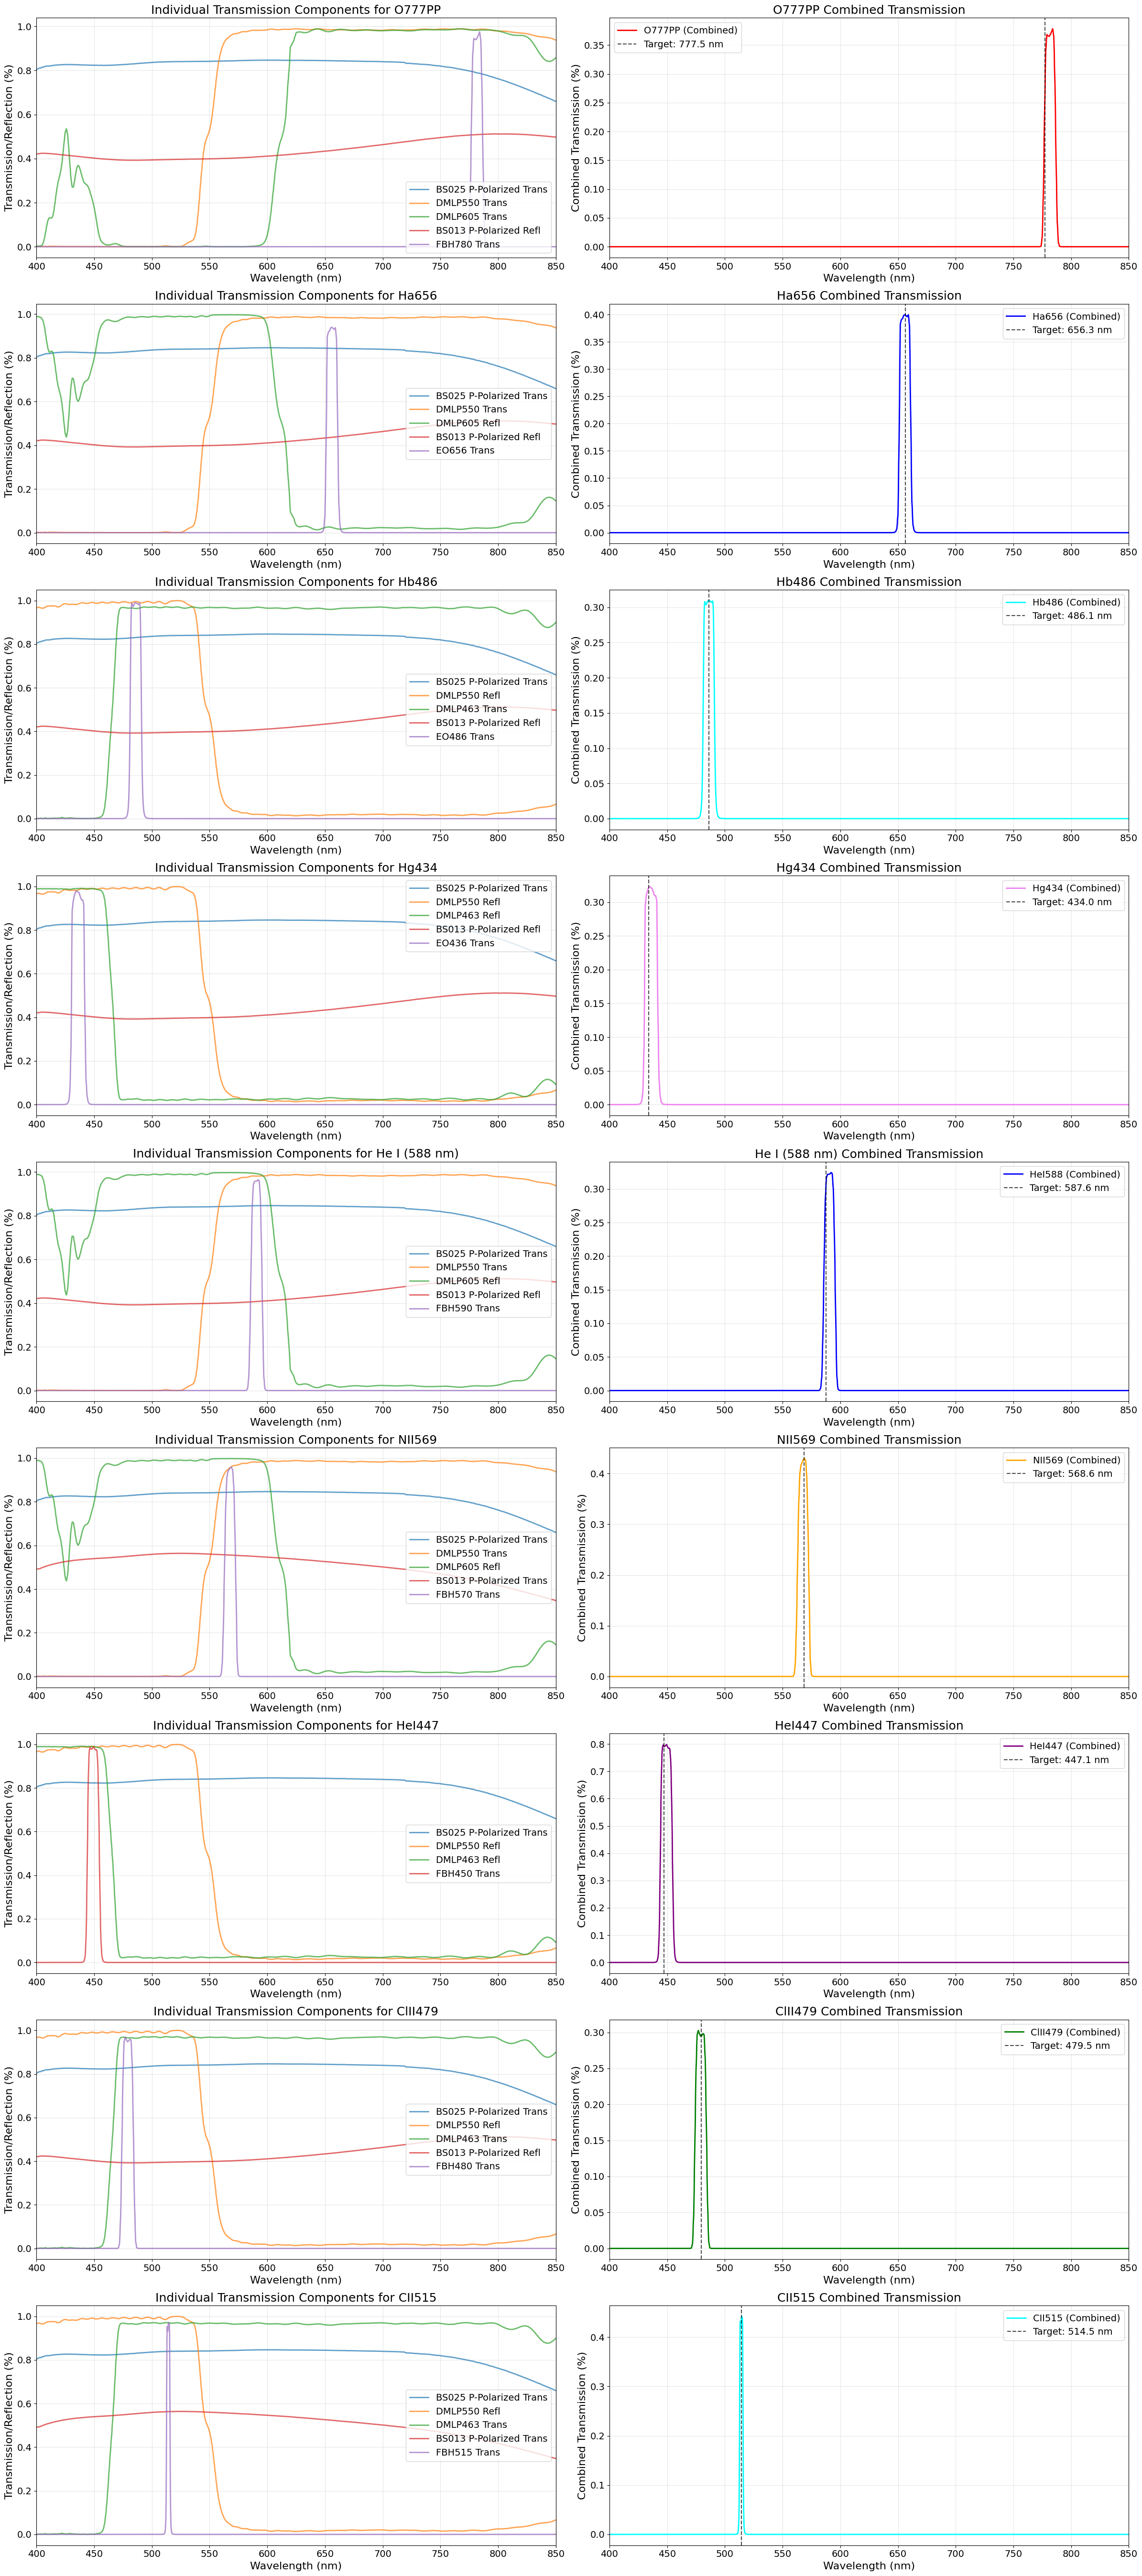

In [4]:
# Plot the transmission data
fig, axes = plt.subplots(9, 2, figsize=(24, 54))

wholePP = spec['bs025_P-Polarizedrefl']

wholeSP = spec['bs025_S-Polarizedrefl']

O777PP = spec['bs025_P-Polarizedtrans'] * spec['dmlp550_Transmission'] * spec['dmlp605_Transmission'] * spec['bs013_P-Polarizedrefl'] * spec['fbh780_Transmission']
Ha656 = spec['bs025_P-Polarizedtrans'] * spec['dmlp550_Transmission'] * spec['dmlp605_Transmission'] * spec['bs013_P-Polarizedtrans'] * spec['eo656_Transmission']
Hb486 = spec['bs025_P-Polarizedtrans'] * spec['dmlp550_Reflectance'] * spec['dmlp463_Transmission'] * spec['bs013_P-Polarizedrefl'] * spec['eo486_Transmission']
Hg434 = spec['bs025_P-Polarizedtrans'] * spec['dmlp550_Reflectance'] * spec['dmlp463_Reflectance'] * spec['bs013_P-Polarizedrefl'] * spec['eo436_Transmission']
HeI588 = spec['bs025_P-Polarizedtrans'] * spec['dmlp550_Transmission'] * spec['dmlp605_Reflectance'] * spec['bs013_P-Polarizedrefl'] * spec['fbh590_Transmission']
NII569 = spec['bs025_P-Polarizedtrans'] * spec['dmlp550_Transmission'] * spec['dmlp605_Reflectance'] * spec['bs013_P-Polarizedtrans'] * spec['fbh570_Transmission']
HeI447 = spec['bs025_P-Polarizedtrans'] * spec['dmlp550_Reflectance'] * spec['dmlp463_Reflectance'] * spec['fbh450_Transmission']
ClII479 = spec['bs025_P-Polarizedtrans'] * spec['dmlp550_Reflectance'] * spec['dmlp463_Transmission'] * spec['bs013_P-Polarizedrefl'] * spec['fbh480_Transmission']
CII515 = spec['bs025_P-Polarizedtrans'] * spec['dmlp550_Reflectance'] * spec['dmlp463_Transmission'] * spec['bs013_P-Polarizedtrans'] * spec['fbh515_Transmission']

# Plot individual transmission components
axes[0][0].plot(spec['Wavelength (nm)'], spec['bs025_P-Polarizedtrans'], 
         label='BS025 P-Polarized Trans', linewidth=2, alpha=0.7)
axes[0][0].plot(spec['Wavelength (nm)'], spec['dmlp550_Transmission'], 
         label='DMLP550 Trans', linewidth=2, alpha=0.7)
axes[0][0].plot(spec['Wavelength (nm)'], spec['dmlp605_Transmission'], 
         label='DMLP605 Trans', linewidth=2, alpha=0.7)
axes[0][0].plot(spec['Wavelength (nm)'], spec['bs013_P-Polarizedrefl'], 
         label='BS013 P-Polarized Refl', linewidth=2, alpha=0.7)
axes[0][0].plot(spec['Wavelength (nm)'], spec['fbh780_Transmission'], 
         label='FBH780 Trans', linewidth=2, alpha=0.7)
axes[0][0].set_xlabel('Wavelength (nm)', fontsize=16)
axes[0][0].set_ylabel('Transmission/Reflection (%)', fontsize=16)
axes[0][0].set_title('Individual Transmission Components for O777PP', fontsize=18)
axes[0][0].legend()
axes[0][0].grid(True, alpha=0.3)

# Plot combined O777PP transmission
axes[0][1].plot(spec['Wavelength (nm)'], O777PP, 
         label='O777PP (Combined)', linewidth=2, color='red')
axes[0][1].axvline(x=777.5, color='black', linestyle='--', linewidth=1.5, alpha=0.7, label='Target: 777.5 nm')
axes[0][1].set_xlabel('Wavelength (nm)', fontsize=16)
axes[0][1].set_ylabel('Combined Transmission (%)', fontsize=16)
axes[0][1].set_title('O777PP Combined Transmission', fontsize=18)
axes[0][1].legend()
axes[0][1].grid(True, alpha=0.3)

# Plot individual transmission components
axes[1][0].plot(spec['Wavelength (nm)'], spec['bs025_P-Polarizedtrans'], 
         label='BS025 P-Polarized Trans', linewidth=2, alpha=0.7)
axes[1][0].plot(spec['Wavelength (nm)'], spec['dmlp550_Transmission'], 
         label='DMLP550 Trans', linewidth=2, alpha=0.7)
axes[1][0].plot(spec['Wavelength (nm)'], spec['dmlp605_Reflectance'], 
         label='DMLP605 Refl', linewidth=2, alpha=0.7)
axes[1][0].plot(spec['Wavelength (nm)'], spec['bs013_P-Polarizedrefl'], 
         label='BS013 P-Polarized Refl', linewidth=2, alpha=0.7)
axes[1][0].plot(spec['Wavelength (nm)'], spec['eo656_Transmission'], 
         label='EO656 Trans', linewidth=2, alpha=0.7)
axes[1][0].set_xlabel('Wavelength (nm)', fontsize=16)
axes[1][0].set_ylabel('Transmission/Reflection (%)', fontsize=16)
axes[1][0].set_title('Individual Transmission Components for Ha656', fontsize=18)
axes[1][0].legend()
axes[1][0].grid(True, alpha=0.3)

# Plot combined Ha656 transmission
axes[1][1].plot(spec['Wavelength (nm)'], Ha656, 
         label='Ha656 (Combined)', linewidth=2, color='blue')
axes[1][1].axvline(x=656.3, color='black', linestyle='--', linewidth=1.5, alpha=0.7, label='Target: 656.3 nm')
axes[1][1].set_xlabel('Wavelength (nm)', fontsize=16)
axes[1][1].set_ylabel('Combined Transmission (%)', fontsize=16)
axes[1][1].set_title('Ha656 Combined Transmission', fontsize=18)
axes[1][1].legend()
axes[1][1].grid(True, alpha=0.3)

# Plot individual transmission components for Hb486
axes[2][0].plot(spec['Wavelength (nm)'], spec['bs025_P-Polarizedtrans'], 
         label='BS025 P-Polarized Trans', linewidth=2, alpha=0.7)
axes[2][0].plot(spec['Wavelength (nm)'], spec['dmlp550_Reflectance'], 
         label='DMLP550 Refl', linewidth=2, alpha=0.7)
axes[2][0].plot(spec['Wavelength (nm)'], spec['dmlp463_Transmission'], 
         label='DMLP463 Trans', linewidth=2, alpha=0.7)
axes[2][0].plot(spec['Wavelength (nm)'], spec['bs013_P-Polarizedrefl'], 
         label='BS013 P-Polarized Refl', linewidth=2, alpha=0.7)
axes[2][0].plot(spec['Wavelength (nm)'], spec['eo486_Transmission'], 
         label='EO486 Trans', linewidth=2, alpha=0.7)
axes[2][0].set_xlabel('Wavelength (nm)', fontsize=16)
axes[2][0].set_ylabel('Transmission/Reflection (%)', fontsize=16)
axes[2][0].set_title('Individual Transmission Components for Hb486', fontsize=18)
axes[2][0].legend()
axes[2][0].grid(True, alpha=0.3)

# Plot combined Hb486 transmission
axes[2][1].plot(spec['Wavelength (nm)'], Hb486, 
         label='Hb486 (Combined)', linewidth=2, color='cyan')
axes[2][1].axvline(x=486.1, color='black', linestyle='--', linewidth=1.5, alpha=0.7, label='Target: 486.1 nm')
axes[2][1].set_xlabel('Wavelength (nm)', fontsize=16)
axes[2][1].set_ylabel('Combined Transmission (%)', fontsize=16)
axes[2][1].set_title('Hb486 Combined Transmission', fontsize=18)
axes[2][1].legend()
axes[2][1].grid(True, alpha=0.3)

# Plot individual transmission components for Hg434
axes[3][0].plot(spec['Wavelength (nm)'], spec['bs025_P-Polarizedtrans'], 
         label='BS025 P-Polarized Trans', linewidth=2, alpha=0.7)
axes[3][0].plot(spec['Wavelength (nm)'], spec['dmlp550_Reflectance'], 
         label='DMLP550 Refl', linewidth=2, alpha=0.7)
axes[3][0].plot(spec['Wavelength (nm)'], spec['dmlp463_Reflectance'], 
         label='DMLP463 Refl', linewidth=2, alpha=0.7)
axes[3][0].plot(spec['Wavelength (nm)'], spec['bs013_P-Polarizedrefl'], 
         label='BS013 P-Polarized Refl', linewidth=2, alpha=0.7)
axes[3][0].plot(spec['Wavelength (nm)'], spec['eo436_Transmission'], 
         label='EO436 Trans', linewidth=2, alpha=0.7)
axes[3][0].set_xlabel('Wavelength (nm)', fontsize=16)
axes[3][0].set_ylabel('Transmission/Reflection (%)', fontsize=16)
axes[3][0].set_title('Individual Transmission Components for Hg434', fontsize=18)
axes[3][0].legend()
axes[3][0].grid(True, alpha=0.3)

# Plot combined Hg434 transmission
axes[3][1].plot(spec['Wavelength (nm)'], Hg434, 
         label='Hg434 (Combined)', linewidth=2, color='violet')
axes[3][1].axvline(x=434.0, color='black', linestyle='--', linewidth=1.5, alpha=0.7, label='Target: 434.0 nm')
axes[3][1].set_xlabel('Wavelength (nm)', fontsize=16)
axes[3][1].set_ylabel('Combined Transmission (%)', fontsize=16)
axes[3][1].set_title('Hg434 Combined Transmission', fontsize=18)
axes[3][1].legend()
axes[3][1].grid(True, alpha=0.3)

# Plot individual transmission components
axes[4][0].plot(spec['Wavelength (nm)'], spec['bs025_P-Polarizedtrans'], 
         label='BS025 P-Polarized Trans', linewidth=2, alpha=0.7)
axes[4][0].plot(spec['Wavelength (nm)'], spec['dmlp550_Transmission'], 
         label='DMLP550 Trans', linewidth=2, alpha=0.7)
axes[4][0].plot(spec['Wavelength (nm)'], spec['dmlp605_Reflectance'], 
         label='DMLP605 Refl', linewidth=2, alpha=0.7)
axes[4][0].plot(spec['Wavelength (nm)'], spec['bs013_P-Polarizedrefl'], 
         label='BS013 P-Polarized Refl', linewidth=2, alpha=0.7)
axes[4][0].plot(spec['Wavelength (nm)'], spec['fbh590_Transmission'], 
         label='FBH590 Trans', linewidth=2, alpha=0.7)
axes[4][0].set_xlabel('Wavelength (nm)', fontsize=16)
axes[4][0].set_ylabel('Transmission/Reflection (%)', fontsize=16)
axes[4][0].set_title('Individual Transmission Components for He I (588 nm)', fontsize=18)
axes[4][0].legend()
axes[4][0].grid(True, alpha=0.3)

# Plot combined HeI588 transmission
axes[4][1].plot(spec['Wavelength (nm)'], HeI588, 
         label='HeI588 (Combined)', linewidth=2, color='blue')
axes[4][1].axvline(x=587.6, color='black', linestyle='--', linewidth=1.5, alpha=0.7, label='Target: 587.6 nm')
axes[4][1].set_xlabel('Wavelength (nm)', fontsize=16)
axes[4][1].set_ylabel('Combined Transmission (%)', fontsize=16)
axes[4][1].set_title('He I (588 nm) Combined Transmission', fontsize=18)
axes[4][1].legend()
axes[4][1].grid(True, alpha=0.3)

# Plot individual transmission components for NII569
axes[5][0].plot(spec['Wavelength (nm)'], spec['bs025_P-Polarizedtrans'], 
         label='BS025 P-Polarized Trans', linewidth=2, alpha=0.7)
axes[5][0].plot(spec['Wavelength (nm)'], spec['dmlp550_Transmission'], 
         label='DMLP550 Trans', linewidth=2, alpha=0.7)
axes[5][0].plot(spec['Wavelength (nm)'], spec['dmlp605_Reflectance'], 
         label='DMLP605 Refl', linewidth=2, alpha=0.7)
axes[5][0].plot(spec['Wavelength (nm)'], spec['bs013_P-Polarizedtrans'], 
         label='BS013 P-Polarized Trans', linewidth=2, alpha=0.7)
axes[5][0].plot(spec['Wavelength (nm)'], spec['fbh570_Transmission'], 
         label='FBH570 Trans', linewidth=2, alpha=0.7)
axes[5][0].set_xlabel('Wavelength (nm)', fontsize=16)
axes[5][0].set_ylabel('Transmission/Reflection (%)', fontsize=16)
axes[5][0].set_title('Individual Transmission Components for NII569', fontsize=18)
axes[5][0].legend()
axes[5][0].grid(True, alpha=0.3)

# Plot combined NII569 transmission
axes[5][1].plot(spec['Wavelength (nm)'], NII569, 
         label='NII569 (Combined)', linewidth=2, color='orange')
axes[5][1].axvline(x=568.6, color='black', linestyle='--', linewidth=1.5, alpha=0.7, label='Target: 568.6 nm')
axes[5][1].set_xlabel('Wavelength (nm)', fontsize=16)
axes[5][1].set_ylabel('Combined Transmission (%)', fontsize=16)
axes[5][1].set_title('NII569 Combined Transmission', fontsize=18)
axes[5][1].legend()
axes[5][1].grid(True, alpha=0.3)

# Plot individual transmission components for HeI447
axes[6][0].plot(spec['Wavelength (nm)'], spec['bs025_P-Polarizedtrans'], 
         label='BS025 P-Polarized Trans', linewidth=2, alpha=0.7)
axes[6][0].plot(spec['Wavelength (nm)'], spec['dmlp550_Reflectance'], 
         label='DMLP550 Refl', linewidth=2, alpha=0.7)
axes[6][0].plot(spec['Wavelength (nm)'], spec['dmlp463_Reflectance'], 
         label='DMLP463 Refl', linewidth=2, alpha=0.7)
axes[6][0].plot(spec['Wavelength (nm)'], spec['fbh450_Transmission'], 
         label='FBH450 Trans', linewidth=2, alpha=0.7)
axes[6][0].set_xlabel('Wavelength (nm)', fontsize=16)
axes[6][0].set_ylabel('Transmission/Reflection (%)', fontsize=16)
axes[6][0].set_title('Individual Transmission Components for HeI447', fontsize=18)
axes[6][0].legend()
axes[6][0].grid(True, alpha=0.3)

# Plot combined HeI447 transmission
axes[6][1].plot(spec['Wavelength (nm)'], HeI447, 
         label='HeI447 (Combined)', linewidth=2, color='purple')
axes[6][1].axvline(x=447.1, color='black', linestyle='--', linewidth=1.5, alpha=0.7, label='Target: 447.1 nm')
axes[6][1].set_xlabel('Wavelength (nm)', fontsize=16)
axes[6][1].set_ylabel('Combined Transmission (%)', fontsize=16)
axes[6][1].set_title('HeI447 Combined Transmission', fontsize=18)
axes[6][1].legend()
axes[6][1].grid(True, alpha=0.3)

# Plot individual transmission components for ClII479
axes[7][0].plot(spec['Wavelength (nm)'], spec['bs025_P-Polarizedtrans'], 
         label='BS025 P-Polarized Trans', linewidth=2, alpha=0.7)
axes[7][0].plot(spec['Wavelength (nm)'], spec['dmlp550_Reflectance'], 
         label='DMLP550 Refl', linewidth=2, alpha=0.7)
axes[7][0].plot(spec['Wavelength (nm)'], spec['dmlp463_Transmission'], 
         label='DMLP463 Trans', linewidth=2, alpha=0.7)
axes[7][0].plot(spec['Wavelength (nm)'], spec['bs013_P-Polarizedrefl'], 
         label='BS013 P-Polarized Refl', linewidth=2, alpha=0.7)
axes[7][0].plot(spec['Wavelength (nm)'], spec['fbh480_Transmission'], 
         label='FBH480 Trans', linewidth=2, alpha=0.7)
axes[7][0].set_xlabel('Wavelength (nm)', fontsize=16)
axes[7][0].set_ylabel('Transmission/Reflection (%)', fontsize=16)
axes[7][0].set_title('Individual Transmission Components for ClII479', fontsize=18)
axes[7][0].legend()
axes[7][0].grid(True, alpha=0.3)

# Plot combined ClII479 transmission
axes[7][1].plot(spec['Wavelength (nm)'], ClII479, 
         label='ClII479 (Combined)', linewidth=2, color='green')
axes[7][1].axvline(x=479.5, color='black', linestyle='--', linewidth=1.5, alpha=0.7, label='Target: 479.5 nm')
axes[7][1].set_xlabel('Wavelength (nm)', fontsize=16)
axes[7][1].set_ylabel('Combined Transmission (%)', fontsize=16)
axes[7][1].set_title('ClII479 Combined Transmission', fontsize=18)
axes[7][1].legend()
axes[7][1].grid(True, alpha=0.3)

# Plot individual transmission components for CII515
axes[8][0].plot(spec['Wavelength (nm)'], spec['bs025_P-Polarizedtrans'], 
         label='BS025 P-Polarized Trans', linewidth=2, alpha=0.7)
axes[8][0].plot(spec['Wavelength (nm)'], spec['dmlp550_Reflectance'], 
         label='DMLP550 Refl', linewidth=2, alpha=0.7)
axes[8][0].plot(spec['Wavelength (nm)'], spec['dmlp463_Transmission'], 
         label='DMLP463 Trans', linewidth=2, alpha=0.7)
axes[8][0].plot(spec['Wavelength (nm)'], spec['bs013_P-Polarizedtrans'], 
         label='BS013 P-Polarized Trans', linewidth=2, alpha=0.7)
axes[8][0].plot(spec['Wavelength (nm)'], spec['fbh515_Transmission'], 
         label='FBH515 Trans', linewidth=2, alpha=0.7)
axes[8][0].set_xlabel('Wavelength (nm)', fontsize=16)
axes[8][0].set_ylabel('Transmission/Reflection (%)', fontsize=16)
axes[8][0].set_title('Individual Transmission Components for CII515', fontsize=18)
axes[8][0].legend()
axes[8][0].grid(True, alpha=0.3)

# Plot combined CII515 transmission
axes[8][1].plot(spec['Wavelength (nm)'], CII515, 
         label='CII515 (Combined)', linewidth=2, color='cyan')
axes[8][1].axvline(x=514.5, color='black', linestyle='--', linewidth=1.5, alpha=0.7, label='Target: 514.5 nm')
axes[8][1].set_xlabel('Wavelength (nm)', fontsize=16)
axes[8][1].set_ylabel('Combined Transmission (%)', fontsize=16)
axes[8][1].set_title('CII515 Combined Transmission', fontsize=18)
axes[8][1].legend()
axes[8][1].grid(True, alpha=0.3)

# Set x-axis limits for all subplots
for ax_row in axes:
    for ax in ax_row:
        ax.set_xlim(400, 850)

mpl.rcParams['figure.dpi'] = 300

for ax_row in axes:
    for ax in ax_row:
        ax.tick_params(axis='both', which='major', labelsize=14)
        ax.legend(fontsize=14)

plt.tight_layout()
plt.show()

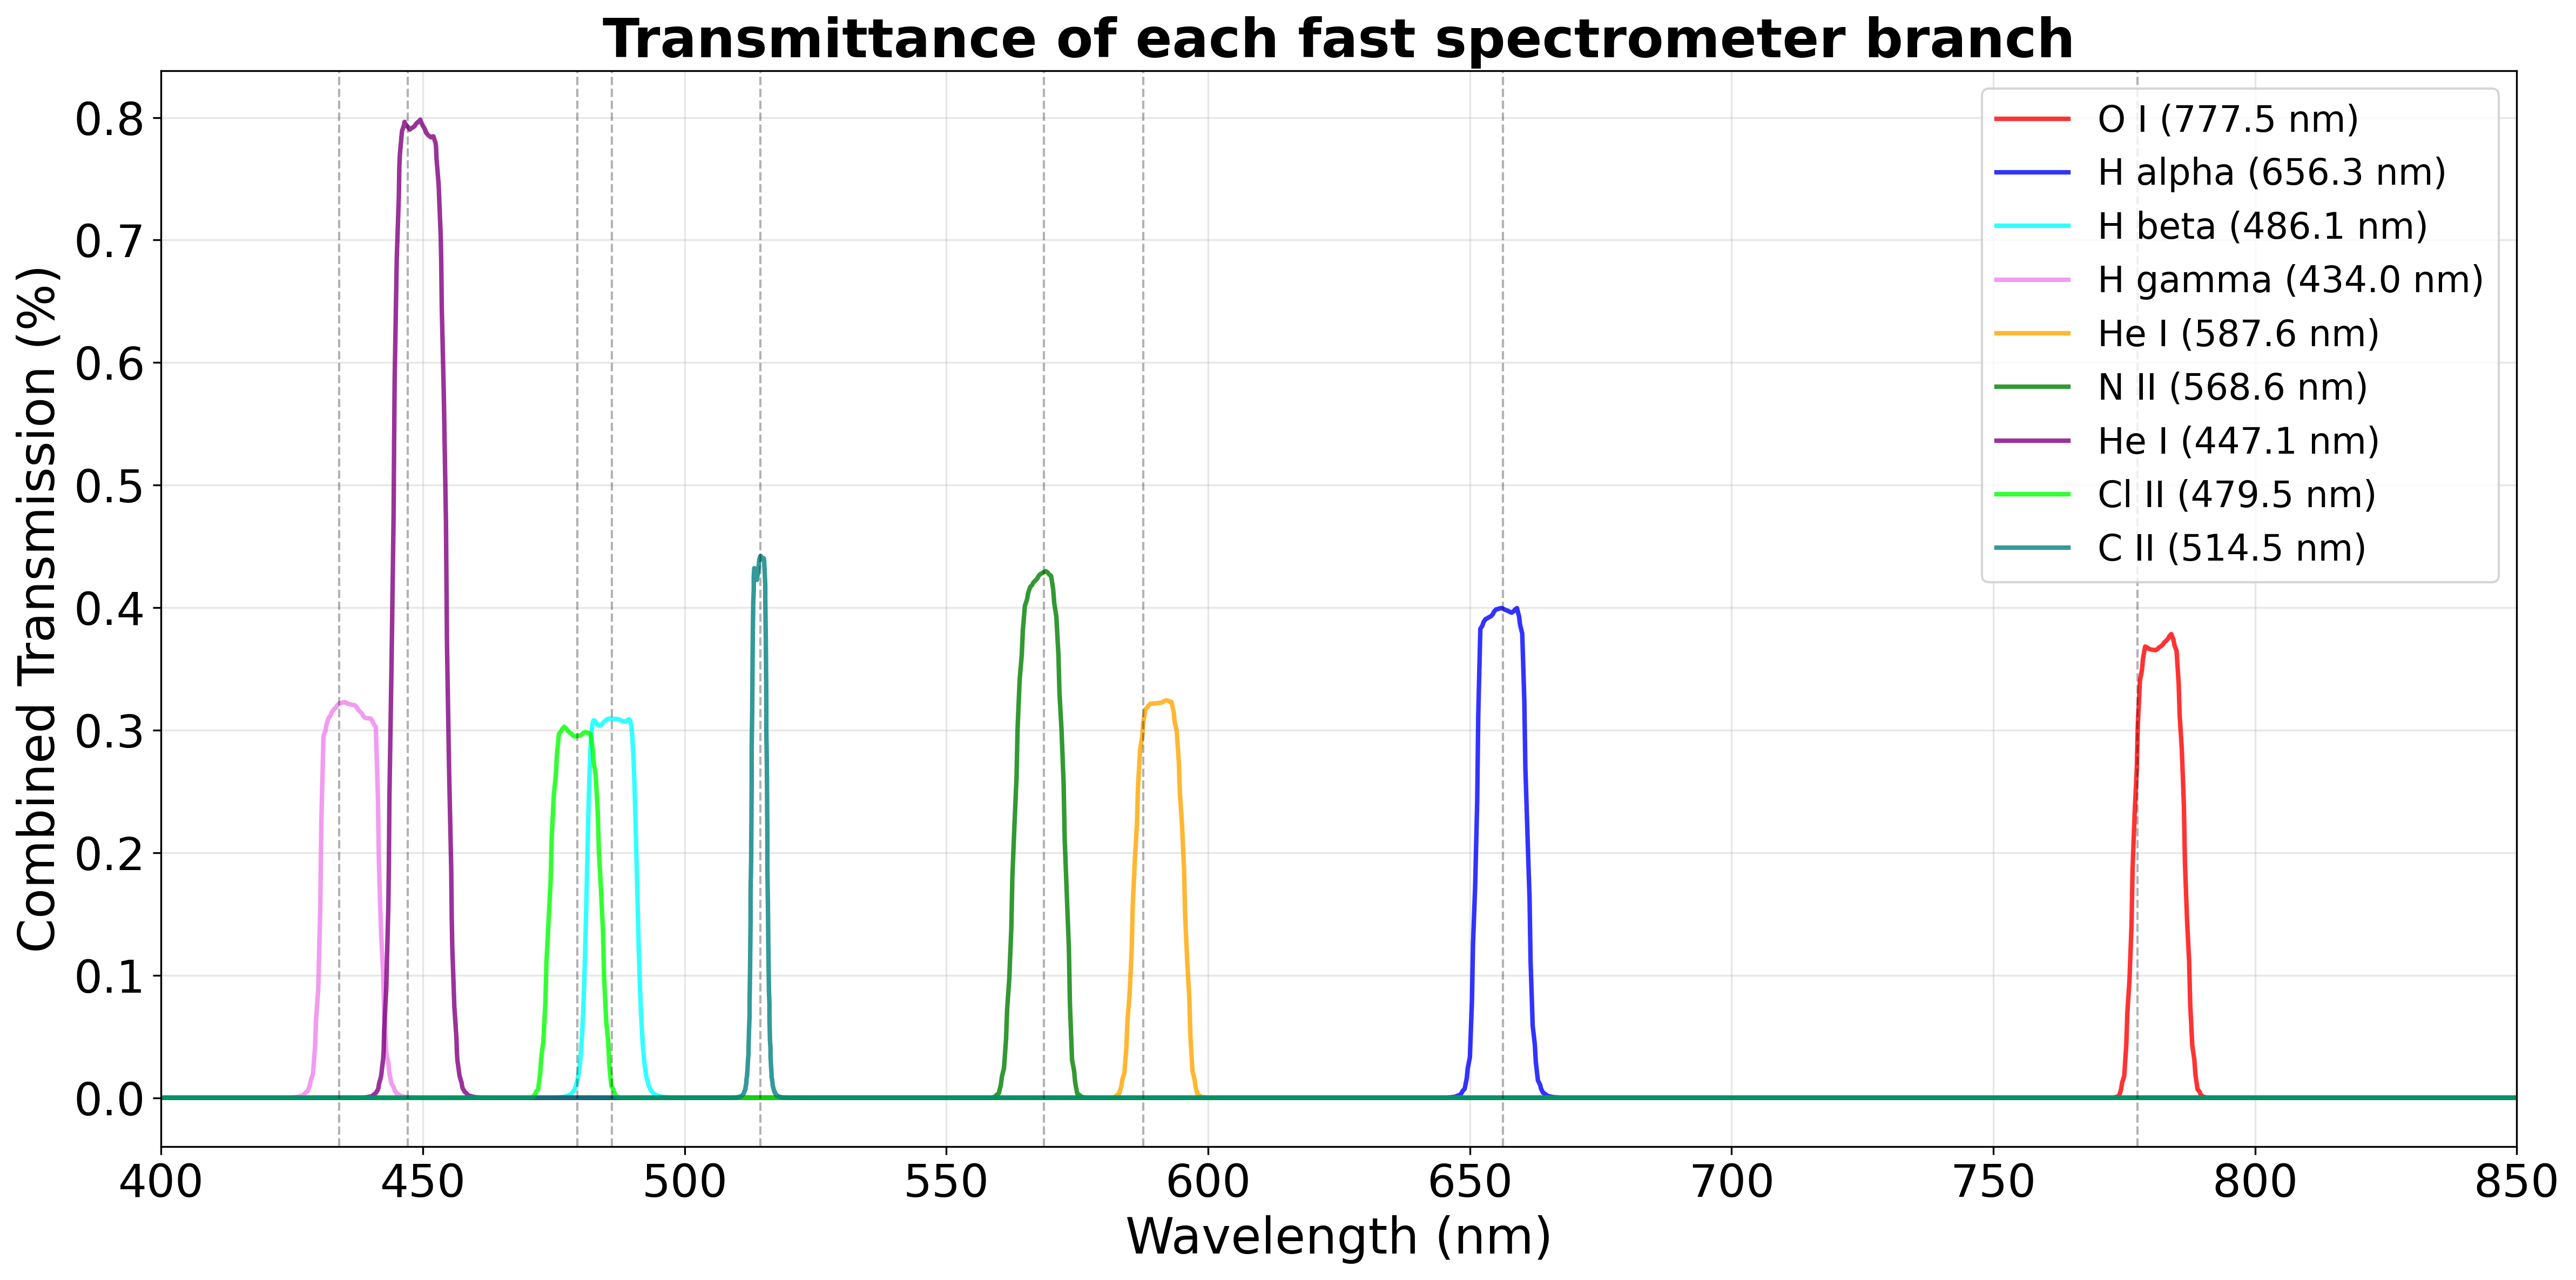

In [7]:
# Plot all combined transmissions in a single figure
fig, ax = plt.subplots(figsize=(16, 8))

# Plot all combined transmissions
ax.plot(spec['Wavelength (nm)'], O777PP, label='O I (777.5 nm)', linewidth=2, color='red', alpha=0.8)
ax.plot(spec['Wavelength (nm)'], Ha656, label='H alpha (656.3 nm)', linewidth=2, color='blue', alpha=0.8)
ax.plot(spec['Wavelength (nm)'], Hb486, label='H beta (486.1 nm)', linewidth=2, color='cyan', alpha=0.8)
ax.plot(spec['Wavelength (nm)'], Hg434, label='H gamma (434.0 nm)', linewidth=2, color='violet', alpha=0.8)
ax.plot(spec['Wavelength (nm)'], HeI588, label='He I (587.6 nm)', linewidth=2, color='orange', alpha=0.8)
ax.plot(spec['Wavelength (nm)'], NII569, label='N II (568.6 nm)', linewidth=2, color='green', alpha=0.8)
ax.plot(spec['Wavelength (nm)'], HeI447, label='He I (447.1 nm)', linewidth=2, color='purple', alpha=0.8)
ax.plot(spec['Wavelength (nm)'], ClII479, label='Cl II (479.5 nm)', linewidth=2, color='lime', alpha=0.8)
ax.plot(spec['Wavelength (nm)'], CII515, label='C II (514.5 nm)', linewidth=2, color='teal', alpha=0.8)

# Add vertical lines for target wavelengths
target_wavelengths = {
    777.5: 'O',
    656.3: 'H alpha',
    486.1: 'H beta',
    434.0: 'H gamma',
    587.6: 'He I',
    568.6: 'N II',
    447.1: 'He I',
    479.5: 'Cl II',
    514.5: 'C II'
}

for wl in target_wavelengths.keys():
    ax.axvline(x=wl, color='black', linestyle='--', linewidth=1, alpha=0.3)

ax.set_xlabel('Wavelength (nm)', fontsize=22)
ax.set_ylabel('Combined Transmission (%)', fontsize=22)
ax.set_title('Transmittance of each fast spectrometer branch', fontsize=24, fontweight='bold')
ax.legend(loc='best', fontsize=16)
ax.tick_params(axis='both', which='major', labelsize=20)
ax.grid(True, alpha=0.3)
ax.set_xlim(400, 850)

mpl.rcParams['figure.dpi'] = 300

plt.tight_layout()
plt.show()

In [6]:
# Export quantum efficiency data for use in fast spectrometry analysis
quantum_efficiency = pd.DataFrame({
    'Wavelength (nm)': spec['Wavelength (nm)'],
    'O777PP': O777PP,
    'Ha656': Ha656,
    'Hb486': Hb486,
    'Hg434': Hg434,
    'HeI588': HeI588,
    'NII569': NII569,
    'HeI447': HeI447,
    'ClII479': ClII479,
    'CII515': CII515
})

# Save to CSV file
quantum_efficiency.to_csv('data/quantum_efficiency.csv', index=False)
print("Quantum efficiency data exported to data/quantum_efficiency.csv")
print(f"Shape: {quantum_efficiency.shape}")
print("\nFirst few rows:")
print(quantum_efficiency.head())

Quantum efficiency data exported to data/quantum_efficiency.csv
Shape: (10656, 10)

First few rows:
   Wavelength (nm)  O777PP  Ha656  Hb486  Hg434  HeI588  NII569  HeI447  \
0            200.0     NaN    NaN    NaN    NaN     NaN     NaN     NaN   
1            200.2     NaN    NaN    NaN    NaN     NaN     NaN     NaN   
2            200.4     NaN    NaN    NaN    NaN     NaN     NaN     NaN   
3            200.5     NaN    NaN    NaN    NaN     NaN     NaN     NaN   
4            200.6     NaN    NaN    NaN    NaN     NaN     NaN     NaN   

   ClII479  CII515  
0      NaN     NaN  
1      NaN     NaN  
2      NaN     NaN  
3      NaN     NaN  
4      NaN     NaN  


## Export Quantum Efficiency Data

This cell exports the calculated quantum efficiency data to a CSV file for use in other analyses. Each column represents the combined transmission/reflection efficiency for a specific spectral line through its optical path:

- **O777PP**: O I 777nm line (P-polarized path)
- **Ha656**: Hα 656.5nm line
- **Hb486**: Hβ 486.1nm line
- **Hg434**: Hγ 434.0nm line
- **HeI588**: He I 588nm line
- **NII569**: N II 568.6nm line
- **HeI447**: He I 447.1nm line
- **ClII479**: Cl II 479.5nm line
- **CII515**: C II 514.5nm line

The exported data is used in the fast spectrometry analysis to weight the spectral integration, accounting for the optical system's wavelength-dependent efficiency.